
# Actividad 5.1 Implementación de una arquitectura tipo AlexNet utilizando el API Funcional de Keras


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
import tensorflow.keras as keras

In [31]:
# definamos las capas del modelo AlexNet

input_tensor = Input(shape=(227, 227, 3))

x_tensor = Conv2D(96, (11,11), strides=4, activation="relu")(input_tensor)
x_tensor = MaxPooling2D(3, strides=2)(x_tensor)

x_tensor = Conv2D(256, (5,5), strides=1, padding="same", activation="relu")(x_tensor)
x_tensor = MaxPooling2D(3, strides=2)(x_tensor)

x_tensor = Conv2D(384, (3,3), strides=1, padding="same", activation="relu")(x_tensor)
x_tensor = Conv2D(384, (3,3), strides=1, padding="same", activation="relu")(x_tensor)
x_tensor = Conv2D(256, (3,3), strides=1, padding="same", activation="relu")(x_tensor)
x_tensor = MaxPooling2D(3, strides=2)(x_tensor)
x_tensor = Dropout(0.5)(x_tensor)

x_tensor = Flatten()(x_tensor)
x_tensor = Dense(4096, activation='relu')(x_tensor)
x_tensor = Dropout(0.5)(x_tensor)
x_tensor = Dense(4096, activation='relu')(x_tensor)
output_tensor = Dense(1000, activation='softmax')(x_tensor)

In [32]:
modelo = keras.Model(inputs=input_tensor, outputs=output_tensor)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_36 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 384)       885120

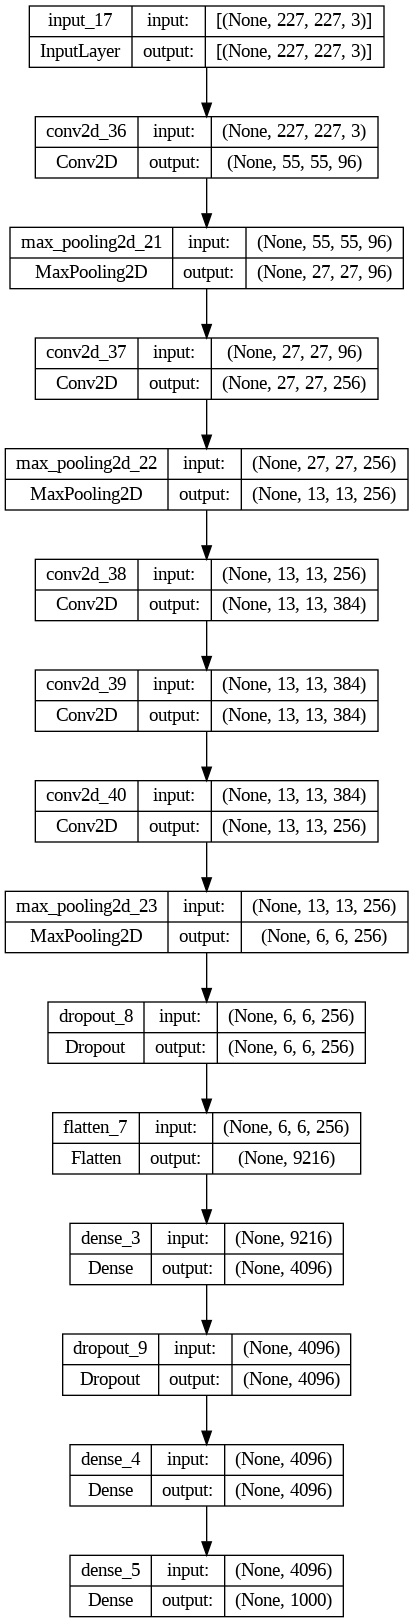

In [33]:
keras.utils.plot_model(modelo, "myAlexNet.png", show_shapes=True, rankdir="TB")